In [1]:
path = "/Users/NoNam/OneDrive/Documents/MMO"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:



dataset = pd.read_csv(path+'/winequality-red.csv')



In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
filtered_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
data = dataset[filtered_columns]
# Нужно ли масштабирование
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:


data.columns



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [34]:
#Масшатбирование


def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res



In [10]:
X_ALL = data.drop('quality', axis=1)

In [11]:


# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['quality'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape



((1279, 11), (320, 11))

# Масштабирование данных на основе Z-оценки

In [12]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [13]:
data_cs11_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,7.700046e-17,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [16]:


# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()



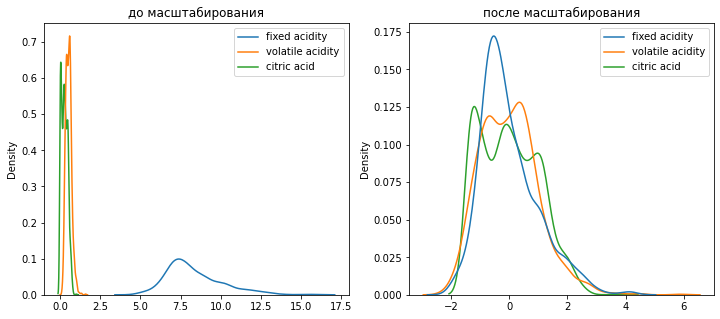

In [18]:


draw_kde(['fixed acidity', 'volatile acidity', 'citric acid'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')



In [19]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [20]:
data_cs12_scaled_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-3.982567e-16,-1.453099e-16,2.048574e-17,-2.808109e-16,1.261262e-16,-1.744760e-17,-9.756768e-17,-4.381553e-14,-3.566429e-15,2.109337e-16,-1.161264e-15
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.083694e+00,-2.303924e+00,-1.358142e+00,-1.178294e+00,-1.588637e+00,-1.412276e+00,-1.236402e+00,-3.474904e+00,-3.666517e+00,-1.951393e+00,-1.889178e+00
25%,-6.768035e-01,-7.354924e-01,-9.032018e-01,-4.634310e-01,-3.695463e-01,-8.381029e-01,-7.388064e-01,-6.248996e-01,-6.694768e-01,-6.479010e-01,-8.722339e-01
50%,-2.265985e-01,-6.330748e-02,-9.441864e-02,-2.489723e-01,-1.803771e-01,-2.639297e-01,-2.723109e-01,1.596071e-02,-3.180862e-02,-2.331536e-01,-2.250880e-01
75%,5.049846e-01,6.088774e-01,7.649135e-01,3.697276e-02,5.082967e-02,5.016347e-01,4.740820e-01,5.890878e-01,6.058596e-01,4.185924e-01,6.069569e-01
max,4.275452e+00,5.874326e+00,3.696752e+00,9.187213e+00,1.098061e+01,5.382107e+00,7.222718e+00,3.621451e+00,4.431869e+00,7.943296e+00,4.120035e+00


In [21]:


data_cs12_scaled_test.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.047745,-0.097442,0.058018,-0.033843,-0.012095,0.055903,0.110604,0.019038,-0.123473,-0.035593,-0.094648
std,0.893287,1.011230,0.919335,1.038552,0.944892,1.003703,1.106175,0.913378,0.912916,1.020972,0.919601
min,-1.858592,-2.303924,-1.358142,-1.178294,-0.958073,-1.220885,-1.236402,-3.474904,-2.837549,-1.714394,-1.611829
25%,-0.620528,-0.847523,-0.751555,-0.463431,-0.369546,-0.742407,-0.707707,-0.510274,-0.733244,-0.647901,-0.872234
50%,-0.170323,-0.175338,0.057228,-0.248972,-0.180377,-0.168234,-0.179012,-0.043957,-0.095575,-0.292403,-0.317537
75%,0.504985,0.552862,0.777551,0.036973,0.071848,0.597330,0.691780,0.496606,0.414559,0.314906,0.514507
max,4.106625,3.269609,2.635225,9.258699,11.001624,4.999325,7.564814,3.621451,2.773931,7.647047,2.640844


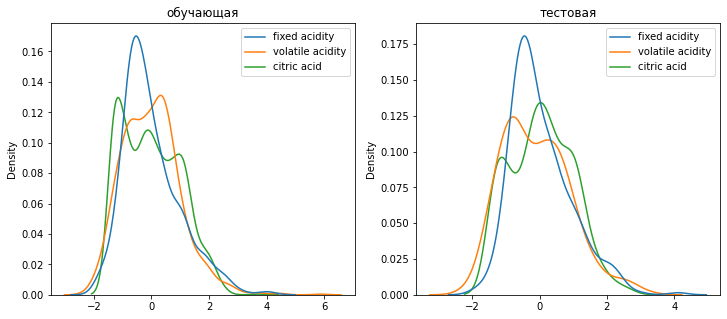

In [22]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['fixed acidity', 'volatile acidity', 'citric acid'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

# Масштабирование "Mean Normalisation"

In [23]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [24]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.001503,-0.002384,0.002297,-0.000653,-0.000193,0.001647,0.002617,0.000537,-0.003051,-0.000720,-0.003152
std,0.154079,0.122644,0.194801,0.097236,0.078705,0.147326,0.120939,0.138571,0.121564,0.101501,0.163949
min,-0.327669,-0.281714,-0.268679,-0.113674,-0.126391,-0.207859,-0.146162,-0.489675,-0.452747,-0.197216,-0.314380
25%,-0.106430,-0.096782,-0.178679,-0.044709,-0.029401,-0.123352,-0.087338,-0.083654,-0.082668,-0.065480,-0.145149
50%,-0.035633,-0.007741,-0.008679,-0.024019,-0.014351,-0.024761,-0.028515,0.000781,-0.003928,-0.023564,-0.037457
75%,0.079411,0.074451,0.151321,0.003567,0.004044,0.073831,0.059720,0.080443,0.066938,0.042305,0.101004
max,0.672331,0.718286,0.731321,0.893222,0.875281,0.792141,0.894279,0.510325,0.547253,0.802784,0.685620


In [25]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [26]:
data_cs22_scaled_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,7.256705e-16,2.140695e-16,1.786209e-16,-8.025571e-17,6.931136e-16,-1.226106e-18,-6.879216e-18,1.650062e-13,-5.688331e-15,1.573973e-16,1.449019e-15
std,1.573153e-01,1.223234e-01,1.979054e-01,9.651156e-02,7.959041e-02,1.472380e-01,1.182619e-01,1.409725e-01,1.235297e-01,1.011039e-01,1.664762e-01
min,-3.276689e-01,-2.817136e-01,-2.686787e-01,-1.136745e-01,-1.263908e-01,-2.078594e-01,-1.461620e-01,-4.896745e-01,-4.527467e-01,-1.972162e-01,-3.143802e-01
25%,-1.064299e-01,-8.993274e-02,-1.786787e-01,-4.470896e-02,-2.940084e-02,-1.233523e-01,-8.733845e-02,-8.805923e-02,-8.266793e-02,-6.547967e-02,-1.451495e-01
50%,-3.563348e-02,-7.740958e-03,-1.867866e-02,-2.401930e-02,-1.435068e-02,-3.884527e-02,-3.219139e-02,2.249142e-03,-3.927773e-03,-2.356351e-02,-3.745715e-02
75%,7.941077e-02,7.445082e-02,1.513213e-01,3.566903e-03,4.043972e-03,7.383079e-02,5.604390e-02,8.301272e-02,7.481238e-02,4.230476e-02,1.010044e-01
max,6.723311e-01,7.182864e-01,7.313213e-01,8.863255e-01,8.736092e-01,7.921406e-01,8.538380e-01,5.103255e-01,5.472533e-01,8.027838e-01,6.856198e-01


In [27]:
data_cs22_scaled_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.007508,-0.011915,0.011478,-0.003265,-0.000962,0.008228,0.013075,0.002683,-0.015247,-0.003597,-0.015750
std,0.140473,0.123649,0.181870,0.100193,0.075175,0.147725,0.130767,0.128711,0.112728,0.103184,0.153032
min,-0.292271,-0.281714,-0.268679,-0.113674,-0.076224,-0.179690,-0.146162,-0.489675,-0.350384,-0.173264,-0.268226
25%,-0.097580,-0.103631,-0.148679,-0.044709,-0.029401,-0.109268,-0.083662,-0.071907,-0.090542,-0.065480,-0.145149
50%,-0.026784,-0.021440,0.011321,-0.024019,-0.014351,-0.024761,-0.021162,-0.006194,-0.011802,-0.029552,-0.052842
75%,0.079411,0.067602,0.153821,0.003567,0.005716,0.087915,0.081779,0.069980,0.051190,0.031826,0.085620
max,0.645782,0.399793,0.521321,0.893222,0.875281,0.735803,0.894279,0.510325,0.342529,0.772844,0.439466


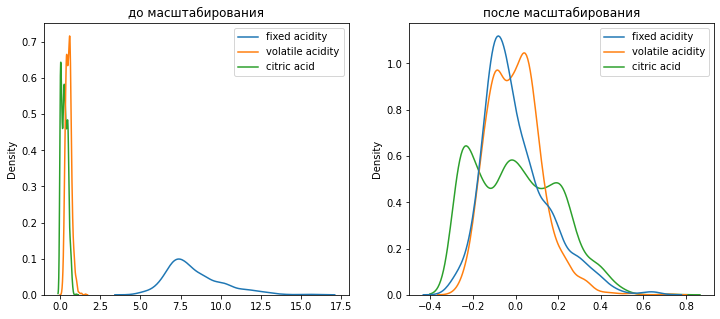

In [28]:
draw_kde(['fixed acidity', 'volatile acidity', 'citric acid'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

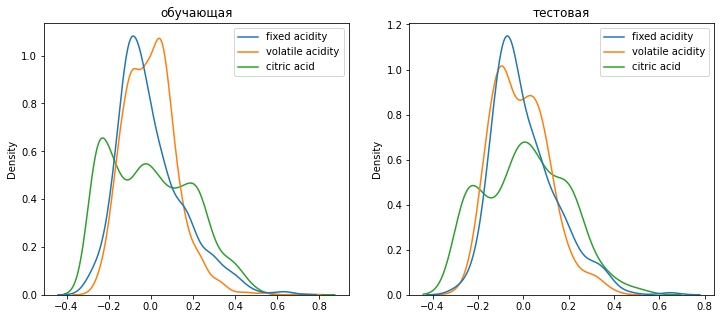

In [29]:
draw_kde(['fixed acidity', 'volatile acidity', 'citric acid'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

# MinMax-масштабирование

In [30]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:


cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)



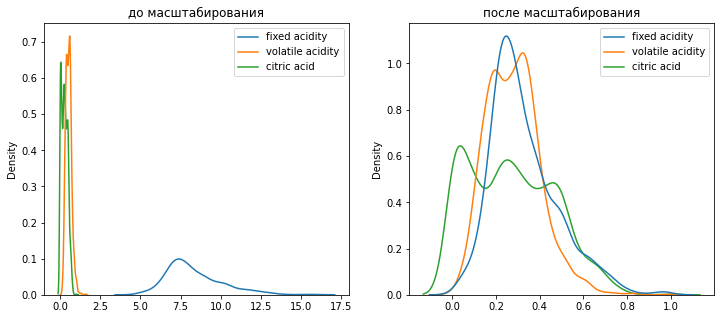

In [32]:
draw_kde(['fixed acidity', 'volatile acidity', 'citric acid'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

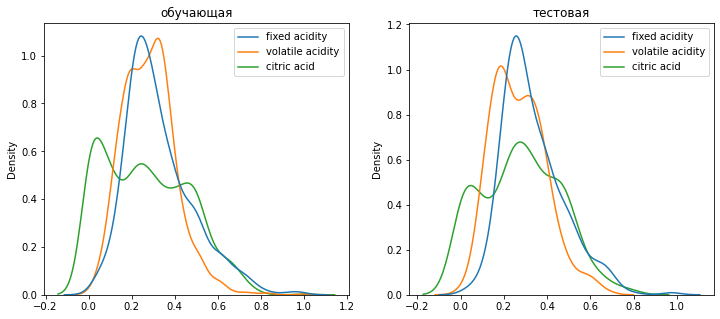

In [33]:
draw_kde(['fixed acidity', 'volatile acidity', 'citric acid'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

# Обработка выбросов

## Удаление выбросов

In [35]:
x_col_list = ['fixed acidity']

In [36]:
# Функция построения графиков - ящики с усами
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [37]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1

In [38]:
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

In [39]:
data.shape

(1599, 12)

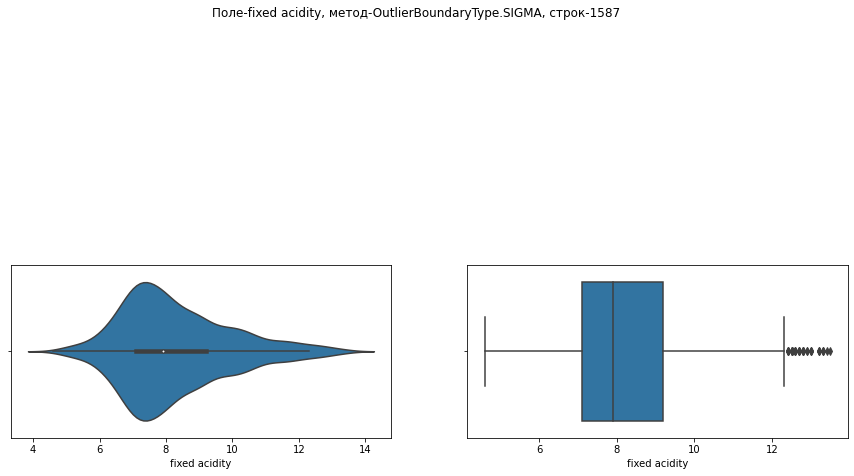

In [40]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

## Замена выбросов


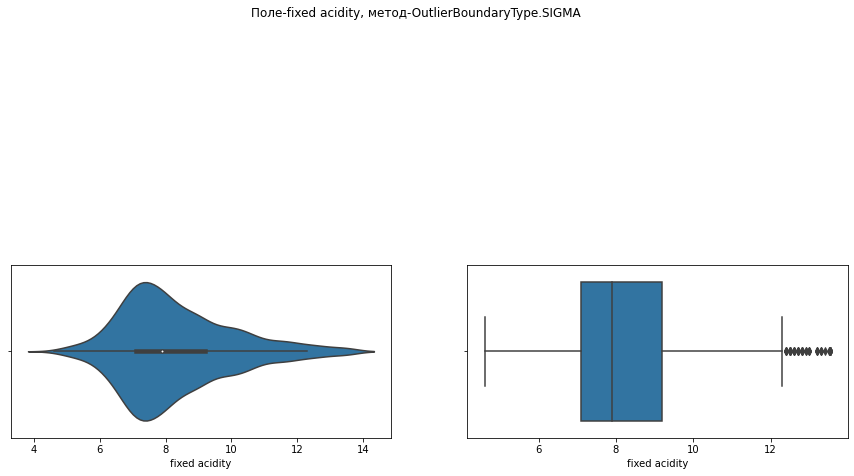

In [41]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

## Обработка нестандартного признака

In [42]:
dataset2 = pd.read_csv(path+'/IOT-temp.csv', sep=",")

In [43]:
dataset2.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [44]:
dataset2.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [45]:


# Сконвертируем дату и время в нужный формат
dataset2['dt'] = dataset2.apply(lambda x: pd.to_datetime(x['noted_date'], format='%d-%m-%Y %H:%M'), axis=1)



In [46]:
dataset2.head()

,id,room_id/id,noted_date,temp,out/in,dt
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,2018-12-08 09:29:00


In [47]:
dataset2.dtypes

id                    object
room_id/id            object
noted_date            object
temp                   int64
out/in                object
dt            datetime64[ns]
dtype: object

In [48]:
# День
dataset2['day'] = dataset2['dt'].dt.day
# Месяц
dataset2['month'] = dataset2['dt'].dt.month
# Год
dataset2['year'] = dataset2['dt'].dt.year
# Часы
dataset2['hour'] = dataset2['dt'].dt.hour
#Минуты
dataset2['minute'] = dataset2['dt'].dt.minute
#Неделя года
dataset2['week'] = dataset2['dt'].dt.isocalendar().week
#Квартал
dataset2['quarter'] = dataset2['dt'].dt.quarter
#День недели 
dataset2['dayofweek'] = dataset2['dt'].dt.dayofweek
#Выходной день
dataset2['day_name'] = dataset2['dt'].dt.day_name()
dataset2['is_holiday'] = dataset2.apply(lambda x: 1 if x['dt'].dayofweek in [5,6] else 0, axis=1)

In [49]:
dataset2.head()

,id,room_id/id,noted_date,temp,out/in,dt,day,month,year,hour,minute,week,quarter,dayofweek,day_name,is_holiday
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00,8,12,2018,9,30,49,4,5,Saturday,1
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00,8,12,2018,9,30,49,4,5,Saturday,1
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1


In [50]:
# Разница между датами 
dataset2['now'] = datetime.datetime.today()
dataset2['diff'] = dataset2['now'] - dataset2['dt']
dataset2.dtypes

id                     object
room_id/id             object
noted_date             object
temp                    int64
out/in                 object
dt             datetime64[ns]
day                     int64
month                   int64
year                    int64
hour                    int64
minute                  int64
week                   UInt32
quarter                 int64
dayofweek               int64
day_name               object
is_holiday              int64
now            datetime64[ns]
diff          timedelta64[ns]
dtype: object

In [51]:


dataset2.head()



,id,room_id/id,noted_date,temp,out/in,dt,day,month,year,hour,minute,week,quarter,dayofweek,day_name,is_holiday,now,diff
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00,8,12,2018,9,30,49,4,5,Saturday,1,2021-06-17 20:08:37.210252,922 days 10:38:37.210252
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,2018-12-08 09:30:00,8,12,2018,9,30,49,4,5,Saturday,1,2021-06-17 20:08:37.210252,922 days 10:38:37.210252
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1,2021-06-17 20:08:37.210252,922 days 10:39:37.210252
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1,2021-06-17 20:08:37.210252,922 days 10:39:37.210252
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,2018-12-08 09:29:00,8,12,2018,9,29,49,4,5,Saturday,1,2021-06-17 20:08:37.210252,922 days 10:39:37.210252


## Отбор признаков методом фильтрации


<AxesSubplot:>

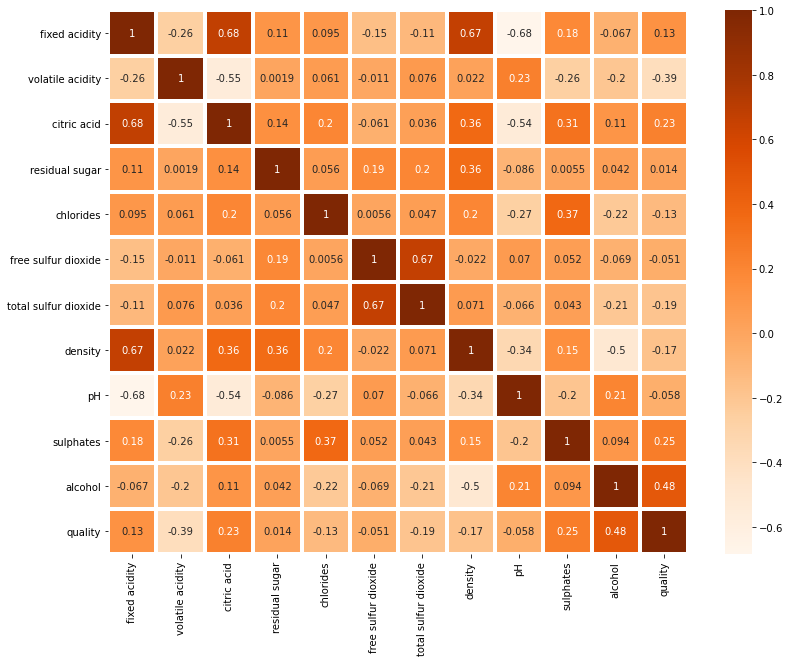

In [52]:


plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap="Oranges", annot=True, linewidths=3)



In [53]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.6]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [54]:
make_corr_df(data)

,f1,f2,corr
0,fixed acidity,pH,0.684042
1,pH,fixed acidity,0.684042
2,fixed acidity,citric acid,0.676505
3,citric acid,fixed acidity,0.676505
4,total sulfur dioxide,free sulfur dioxide,0.667666
5,free sulfur dioxide,total sulfur dioxide,0.667666
6,density,fixed acidity,0.667501
7,fixed acidity,density,0.667501


In [55]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [56]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['pH', 'citric acid', 'density', 'fixed acidity'],
 ['free sulfur dioxide', 'total sulfur dioxide']]

## Отбор признаков из группы методом вложения (логистическая регрессия)

In [57]:


from sklearn.linear_model import LogisticRegression
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X_train, y_train)
# Коэффициенты регрессии
e_lr1.coef_



array([[ 6.46409213e-01,  8.76118268e+00,  5.90533894e+00,
         2.28305682e-01,  1.91458634e+00,  1.14357770e-01,
        -9.91780996e-02, -1.55717722e+01,  1.17285929e+01,
         4.73471731e-01, -2.02674160e+00],
       [-1.44235768e-01,  4.08751899e+00,  8.83835288e-01,
         2.17906135e-01,  3.14878776e+00, -4.76336577e-02,
        -7.83610977e-03, -3.23991302e+00,  1.65717527e+00,
         4.10151917e-02, -2.03043562e-01],
       [-1.14602888e-01,  1.58911884e+00,  7.95799089e-01,
        -8.52617469e-02,  2.54144420e+00, -1.84332213e-02,
         1.90448701e-02,  5.72610643e+00, -2.52562872e-01,
        -2.44672799e+00, -8.93561222e-01],
       [ 1.07719070e-01, -1.69058057e+00, -1.48767718e+00,
         4.20510096e-03,  9.00863917e-01,  1.96310477e-02,
        -1.12061553e-02, -2.64121678e+00,  8.30358013e-01,
         6.46344996e-01,  1.81763283e-01],
       [ 7.26466399e-02, -3.51193258e+00, -1.36283132e-01,
         1.31431957e-01, -9.49253318e+00,  2.43348811e-02,
  

In [58]:
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X_train, y_train)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])